## Type 1 and Type 2 Errors
- revision from graduate training
- what are these
- alpha and beta

### Alpha and Type 1 Errors

When conducting hypothesis testing, there will almost always be the chance of accidentally rejecting a null hypothesis when it should not have been rejected. Data scientists have the ability to choose a confidence level, alpha ($\alpha$) that they will use as the threshold for accepting or rejecting the null hypothesis. This confidence level is also the probability that you reject the null hypothesis when it is actually true. This scenario is a Type 1 error, more commonly known as a **False Positive**. 

Here is a scenario that will better explain how a Type 1 error might occur:

Say that you flipped a coin 30 times and get a total of 23 heads. The first thought in your head is, is this a fair coin? With that you can create the following null hypothesis:

**Null Hypothesis:** This coin is fair.

**Alternative Hypothesis:** This coin is not fair.

Or expressed mathematically:

$H_{0} : \mu = 0.5 $

$H_{1} : \mu \neq 0.5$

The null hypothesis is assumed to be true unless there is overwhelming evidence to the contrary. To quantify this you must determine what level of confidence for which you will reject the null hypothesis. If a researcher was to set **alpha ($\alpha$) = .05**, this indicates that there is a 5% chance that you will reject the null hypothesis when it is actually true. Another way to think about this is that if you repeated this experiment 20 times, you would expect to see a the hypothesis rejected, purely by chance, one time. The threshold for alpha varies significantly depending on your scientific disciplines. Physics, for example, often require that findings are significant to the an alpha level of 0.0000003 or, in other words, one would expect results to occur by chance at most one out of 3.5 million trials! For most other disciplines, an $\alpha$ level of 0.05 is enough to prove some results are statistically significant.



### Beta and Type 2 Errors
Another type of error is beta ($\beta$), which is the probability that you fail to reject the null hypothesis when it is actually false. Type 2 errors are also referred to as **False Negatives**. Beta is related to something called _Power_, which is the probability of rejecting the null hypothesis given that it actually is false. Mathematically, _Power_ = 1 - $\beta$. When designing an experiment, scientists will frequently choose a power level they want for an experiment and from that obtain their Type 2 error rate.

The standard deviation of a binomial distribution is given by:  

$\sigma = \sqrt{n \bullet p \bullet (1-p)}$

 p-value using a traditional z-test:

### $ z = \frac{\bar{x}-\mu}{\sigma/\sqrt{n}}$


In [2]:
import numpy as np
n = 20 #Number of flips
p = .75 #Simulating an unfair coin
coin1 = np.random.binomial(n, p)
coin1

17

In [3]:
sigma = np.sqrt(n*.5*(1-.5))
sigma

2.23606797749979

In [4]:
z = (coin1 - 10) / (sigma / np.sqrt(n))
z

14.0

In [5]:
# get p-value
import scipy.stats as st
st.norm.sf(np.abs(z))

7.7935368191928e-45

In [ ]:
# very small p -value = reject the null hyperthesis

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

Text(0.5, 1.0, 'Average p-values of hypothesis testing with unfair coin of .75 by number of trails')

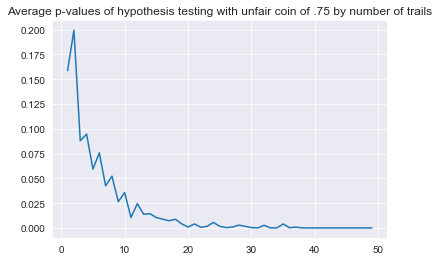

In [11]:
p_vals = []

for n in range(1,50):
    
    p_val = []
    for i in range(200):
        p = .75
        n_heads = np.random.binomial(n,p)
        mu = n / 2
        sigma = np.sqrt(n*.5*(1-.5))
        z = (n_heads - mu) / (sigma / np.sqrt(n))
        p_val.append(st.norm.sf(np.abs(z)))
    p_vals.append(np.mean(p_val))
plt.plot(list(range(1,50)), p_vals)
plt.title('Average p-values of hypothesis testing with unfair coin of .75 by number of trails')